<a href="https://colab.research.google.com/github/XescLlabres/tfgFLM/blob/main/WDBC/AvaluacioModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd

#Taules amb intervals

In [ ]:
# Llegir les taules

taula1 = pd.read_csv('bootstrap_probabilities_id.csv')
taula2 = pd.read_csv('data.csv.xls')
#Preprocés
taula2.drop(['Unnamed: 32'],axis=1,inplace=True)
taula2.diagnosis=[1 if each=="M" else 0 for each in taula2.diagnosis]


In [ ]:


# Extreim la columna id
id_column = taula1.iloc[:, 0]

# Extreim les 1000 probabilitats
probabilities = taula1.iloc[:, 1:]

# Aplicam el llindar de 0.5 per convertir 1000 probabilitats en una predicció (0 o 1)
#Prenem la mitjana de les probabilitats de cada fila i hi aplicam el llindar
y_pred = (probabilities.mean(axis=1) >= 0.5).astype(int)

# Cream una taula nova amb id i columna de predicció
taula1_processed = pd.DataFrame({'id': id_column, 'y_pred': y_pred})

#Processam la taula2 per només obtenir identificació i columna diagnosis (y_true)
taula2_processed = taula2[['id', 'diagnosis']]
taula2_processed.rename(columns={'diagnosis': 'y_true'}, inplace=True)

#Unim les taules
taula05 = pd.merge(taula1_processed, taula2_processed, on='id')

print(taula05.head())


         id  y_pred  y_true
0    842302       1       1
1    842517       1       1
2  84300903       1       1
3  84348301       1       1
4  84358402       1       1


<ipython-input-15-ee294f66bce2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taula2_processed.rename(columns={'diagnosis': 'y_true'}, inplace=True)


In [ ]:
# Guardam la taula en un csv per analitzar-la
taula05.to_csv('ruta_a_tu_archivo_taula3.csv', index=False)

Anàlisi taula amb umbral 0.5

In [ ]:


y_pred = taula05['y_pred']
y_true = taula05['y_true']

# 1. Matriu de confusió
cm = confusion_matrix(y_true, y_pred)
print("Matriu de confusió:")
print(cm)

# 2. Presició
precision = precision_score(y_true, y_pred)
print(f"Presició: {precision:.2f}")

# 3. Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

# 4. F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.2f}")

# 5. Exactitut
accuracy = accuracy_score(y_true, y_pred)
print(f"Exactitut: {accuracy:.2f}")


Matriu de confusió:
[[354   3]
 [  7 205]]
Presició: 0.99
Recall: 0.97
F1-Score: 0.98
Exactitut: 0.98


Feim exactament el mateix però amb el llindar a 0.8, serà molt més difícil obtenir un 1 a l'y_pred.

In [ ]:

id_column = taula1.iloc[:, 0]


probabilities = taula1.iloc[:, 1:]

#Canviam el llindar
y_pred = (probabilities.mean(axis=1) >= 0.8).astype(int)


taula1_processed = pd.DataFrame({'id': id_column, 'y_pred': y_pred})


taula2_processed = taula2[['id', 'diagnosis']]
taula2_processed.rename(columns={'diagnosis': 'y_true'}, inplace=True)


taula08 = pd.merge(taula1_processed, taula2_processed, on='id')


<ipython-input-18-84d773736bfc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taula2_processed.rename(columns={'diagnosis': 'y_true'}, inplace=True)


In [ ]:

y_pred = taula08['y_pred']
y_true = taula08['y_true']

# 1. Matriu de confusió
cm = confusion_matrix(y_true, y_pred)
print("Matriu de confusió:")
print(cm)

# 2. Precisió
precision = precision_score(y_true, y_pred)
print(f"Precisió: {precision:.2f}")

# 3. Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

# 4. F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.2f}")

# 5. Exactitut
accuracy = accuracy_score(y_true, y_pred)
print(f"Exactitut: {accuracy:.2f}")

Matriu de confusió:
[[357   0]
 [ 22 190]]
Precisió: 1.00
Recall: 0.90
F1-Score: 0.95
Exactitut: 0.96


Tenim 0 falsos negatius, però més falsos positius. En general, pitjors resultats.

Ara amb 0.2, llavors serà més fàcil obtenir un 1.

In [ ]:

id_column = taula1.iloc[:, 0]


probabilities = taula1.iloc[:, 1:]

#Canviam el llindar
y_pred = (probabilities.mean(axis=1) >= 0.2).astype(int)


taula1_processed = pd.DataFrame({'id': id_column, 'y_pred': y_pred})


taula2_processed = taula2[['id', 'diagnosis']]
taula2_processed.rename(columns={'diagnosis': 'y_true'}, inplace=True)


taula02 = pd.merge(taula1_processed, taula2_processed, on='id')

<ipython-input-20-5b7afd1eeac0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taula2_processed.rename(columns={'diagnosis': 'y_true'}, inplace=True)


In [ ]:

y_pred = taula02['y_pred']
y_true = taula02['y_true']

# 1. Matriu de confusió
cm = confusion_matrix(y_true, y_pred)
print("Matriu de confusió:")
print(cm)

# 2. Precisió
precision = precision_score(y_true, y_pred)
print(f"Precisió: {precision:.2f}")

# 3. Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

# 4. F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.2f}")

# 5. Exactitut
accuracy = accuracy_score(y_true, y_pred)
print(f"Exactitut: {accuracy:.2f}")

Matriu de confusió:
[[338  19]
 [  5 207]]
Precisió: 0.92
Recall: 0.98
F1-Score: 0.95
Exactitut: 0.96


Menys falsos positius, però 19 falsos negatius, que són molts en el camp sanitari.

# ROC, AUC i llindar òptim.

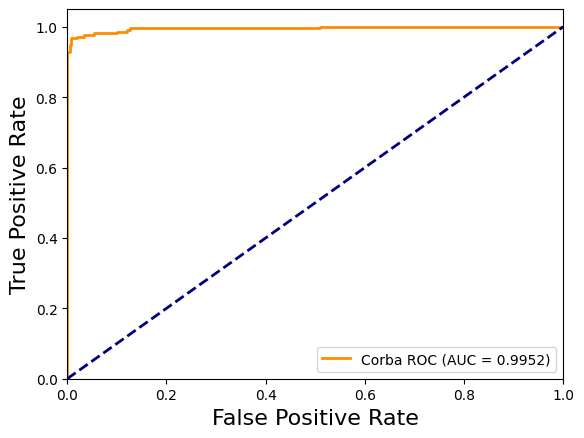

AUC: 0.9951905290418054


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('prob_id_diag.csv')

y_true = data['diagnosis']
prob_columns = data.columns[2:]

# Calculam la mitja de les probabilitats per files (pacients)
prob_avg = data[prob_columns].mean(axis=1)

# Calculam la corba ROC i l'AUC
fpr, tpr, thresholds = roc_curve(y_true, prob_avg)
roc_auc = auc(fpr, tpr)

# Grafica, la corba ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Corba ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize= 16)
plt.legend(loc="lower right")
plt.show()

# Imprimim l'AUC
print(f'AUC: {roc_auc}')


In [ ]:
# Calculam el punt de Youden per a trobar el llindar òptim (maximitza sensibilitat + especificitat - 1)
youden_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[youden_index]

print(f'Umbral óptimo: {optimal_threshold}')


Umbral óptimo: 0.5111500438483546
